# Tache 1 : Importation des modules


In [1]:
import missingno as msno
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

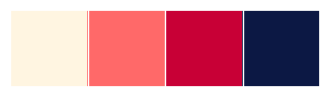

In [3]:
nutrition_palette = ['#FFF5E1','#FF6969', '#C80036', '#0C1844']
sns.set(palette= nutrition_palette)
sns.palplot(sns.color_palette())

In [2]:
Data = pd.read_csv('products.csv' , sep = "\t", parse_dates=['created_datetime','last_modified_datetime'], low_memory= False)

In [4]:
Data


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15 10:38:00+00:00,1561463718,2019-06-25 11:55:18+00:00,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13 21:06:14+00:00,1539464817,2018-10-13 21:06:57+00:00,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19 15:02:16+00:00,1574175737,2019-11-19 15:02:17+00:00,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11 14:09:21+00:00,1444659212,2015-10-12 14:13:32+00:00,moutarde au moût de raisin,NaN,100g,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08 18:56:13+00:00,1560020173,2019-06-08 18:56:13+00:00,Sfiudwx,NaN,dgesc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109368,0041667038708,http://world-en.openfoodfacts.org/product/0041...,usda-ndb-import,1489071517,2017-03-09 14:58:37+00:00,1587584896,2020-04-22 19:48:16+00:00,"Pop Weaver, Slim Pop Microwave Popcorn",NaN,NaN,...,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109369,0041667038739,http://world-en.openfoodfacts.org/product/0041...,usda-ndb-import,1489074275,2017-03-09 15:44:35+00:00,1498399295,2017-06-25 14:01:35+00:00,"Pop Weaver, Slim Pop Microwave Popcorn",NaN,NaN,...,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109370,0041667051103,http://world-en.openfoodfacts.org/product/0041...,org-database-usda,1587655525,2020-04-23 15:25:25+00:00,1587655525,2020-04-23 15:25:25+00:00,Microwave popcorn,NaN,NaN,...,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109371,0041667051110,http://world-en.openfoodfacts.org/product/0041...,usda-ndb-import,1489074815,2017-03-09 15:53:35+00:00,1498399294,2017-06-25 14:01:34+00:00,"Pop Weaver, Microwave Popcorn, Light Butter",NaN,NaN,...,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### On va remplacer les tirets "-" en des tirets "_"
 

In [11]:
Data.columns = [col.replace("-","_") for col in Data.columns]

In [11]:
data_size = Data.shape
nb_rows = data_size[0]
nb_cols = data_size[1]
print(f'nbre de lignes sont {nb_rows}')
print(f'nbre de colonnes sont {nb_cols}')
print(f'Dimension de Data est {nb_rows*nb_cols}')

nbre de lignes sont 109373
nbre de colonnes sont 181
Dimension de Data est 19796513


# Les valeurs manquantes

In [12]:
len(Data['code'].unique())

109373

Les codes sont uniques


In [15]:
Data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109373 entries, 0 to 109372
Data columns (total 181 columns):
 #    Column                                      Dtype              
---   ------                                      -----              
 0    code                                        object             
 1    url                                         object             
 2    creator                                     object             
 3    created_t                                   int64              
 4    created_datetime                            datetime64[ns, UTC]
 5    last_modified_t                             int64              
 6    last_modified_datetime                      datetime64[ns, UTC]
 7    product_name                                object             
 8    generic_name                                object             
 9    quantity                                    object             
 10   packaging                                 

Analyse des valeurs manquantes

In [29]:
missing_value = Data.isna().sum().sum()/Data.size
print(missing_value)
print(f'la pourcentage des valeurs manquantes: \t {round(missing_value * 100)}%')

0.7388060715541166
la pourcentage des valeurs manquantes: 	 74%


Missing value per column

In [32]:
missing_percentage_per_column  = Data.isnull().sum().sort_values(ascending=False)/nb_rows
missing_percentage_per_column


carnitine_100g           1.0
allergens_en             1.0
-cerotic-acid_100g       1.0
-lignoceric-acid_100g    1.0
-stearic-acid_100g       1.0
                        ... 
last_modified_t          0.0
created_datetime         0.0
created_t                0.0
creator                  0.0
code                     0.0
Length: 181, dtype: float64

<BarContainer object of 181 artists>

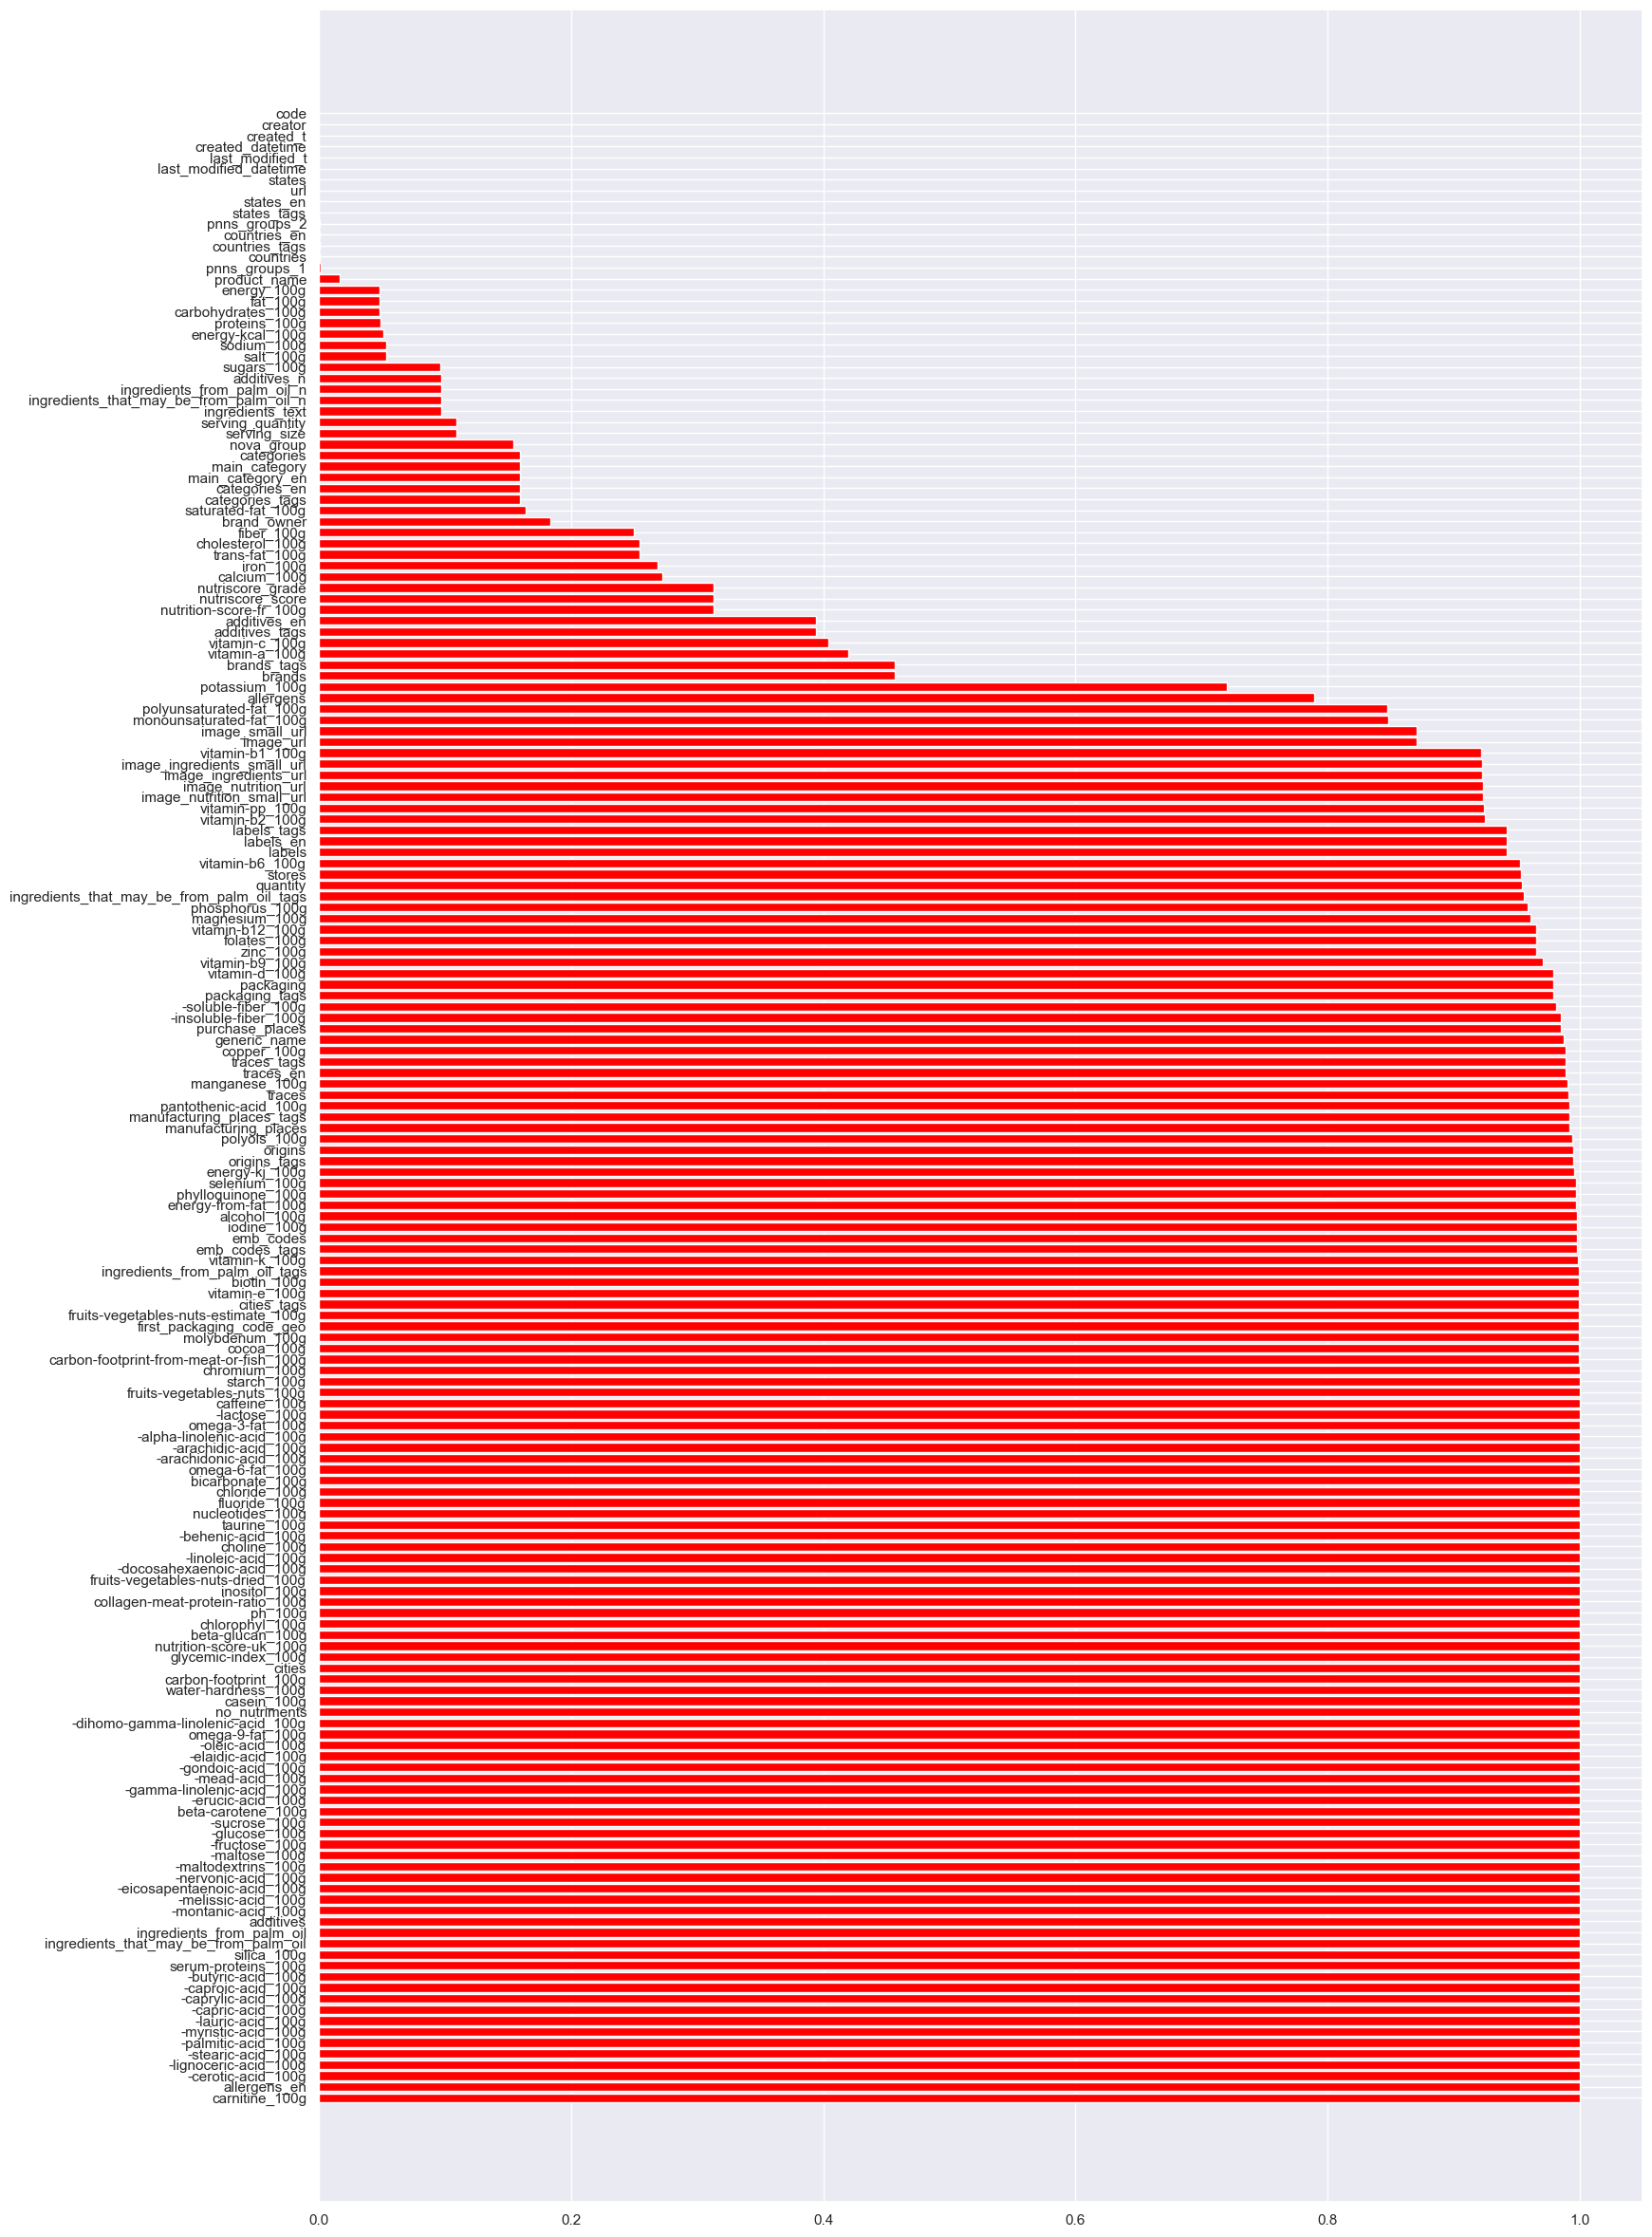

In [38]:
from matplotlib import pyplot as plt 
plt.figure(figsize=(18,30))
plt.barh(missing_percentage_per_column.index,missing_percentage_per_column.values , color = 'red')

# supression des lignes et des colonnes 

In [41]:
columns_too_empty = missing_percentage_per_column[missing_percentage_per_column > 0.4].index
Data.drop(columns=columns_too_empty , inplace=True)


<Axes: >

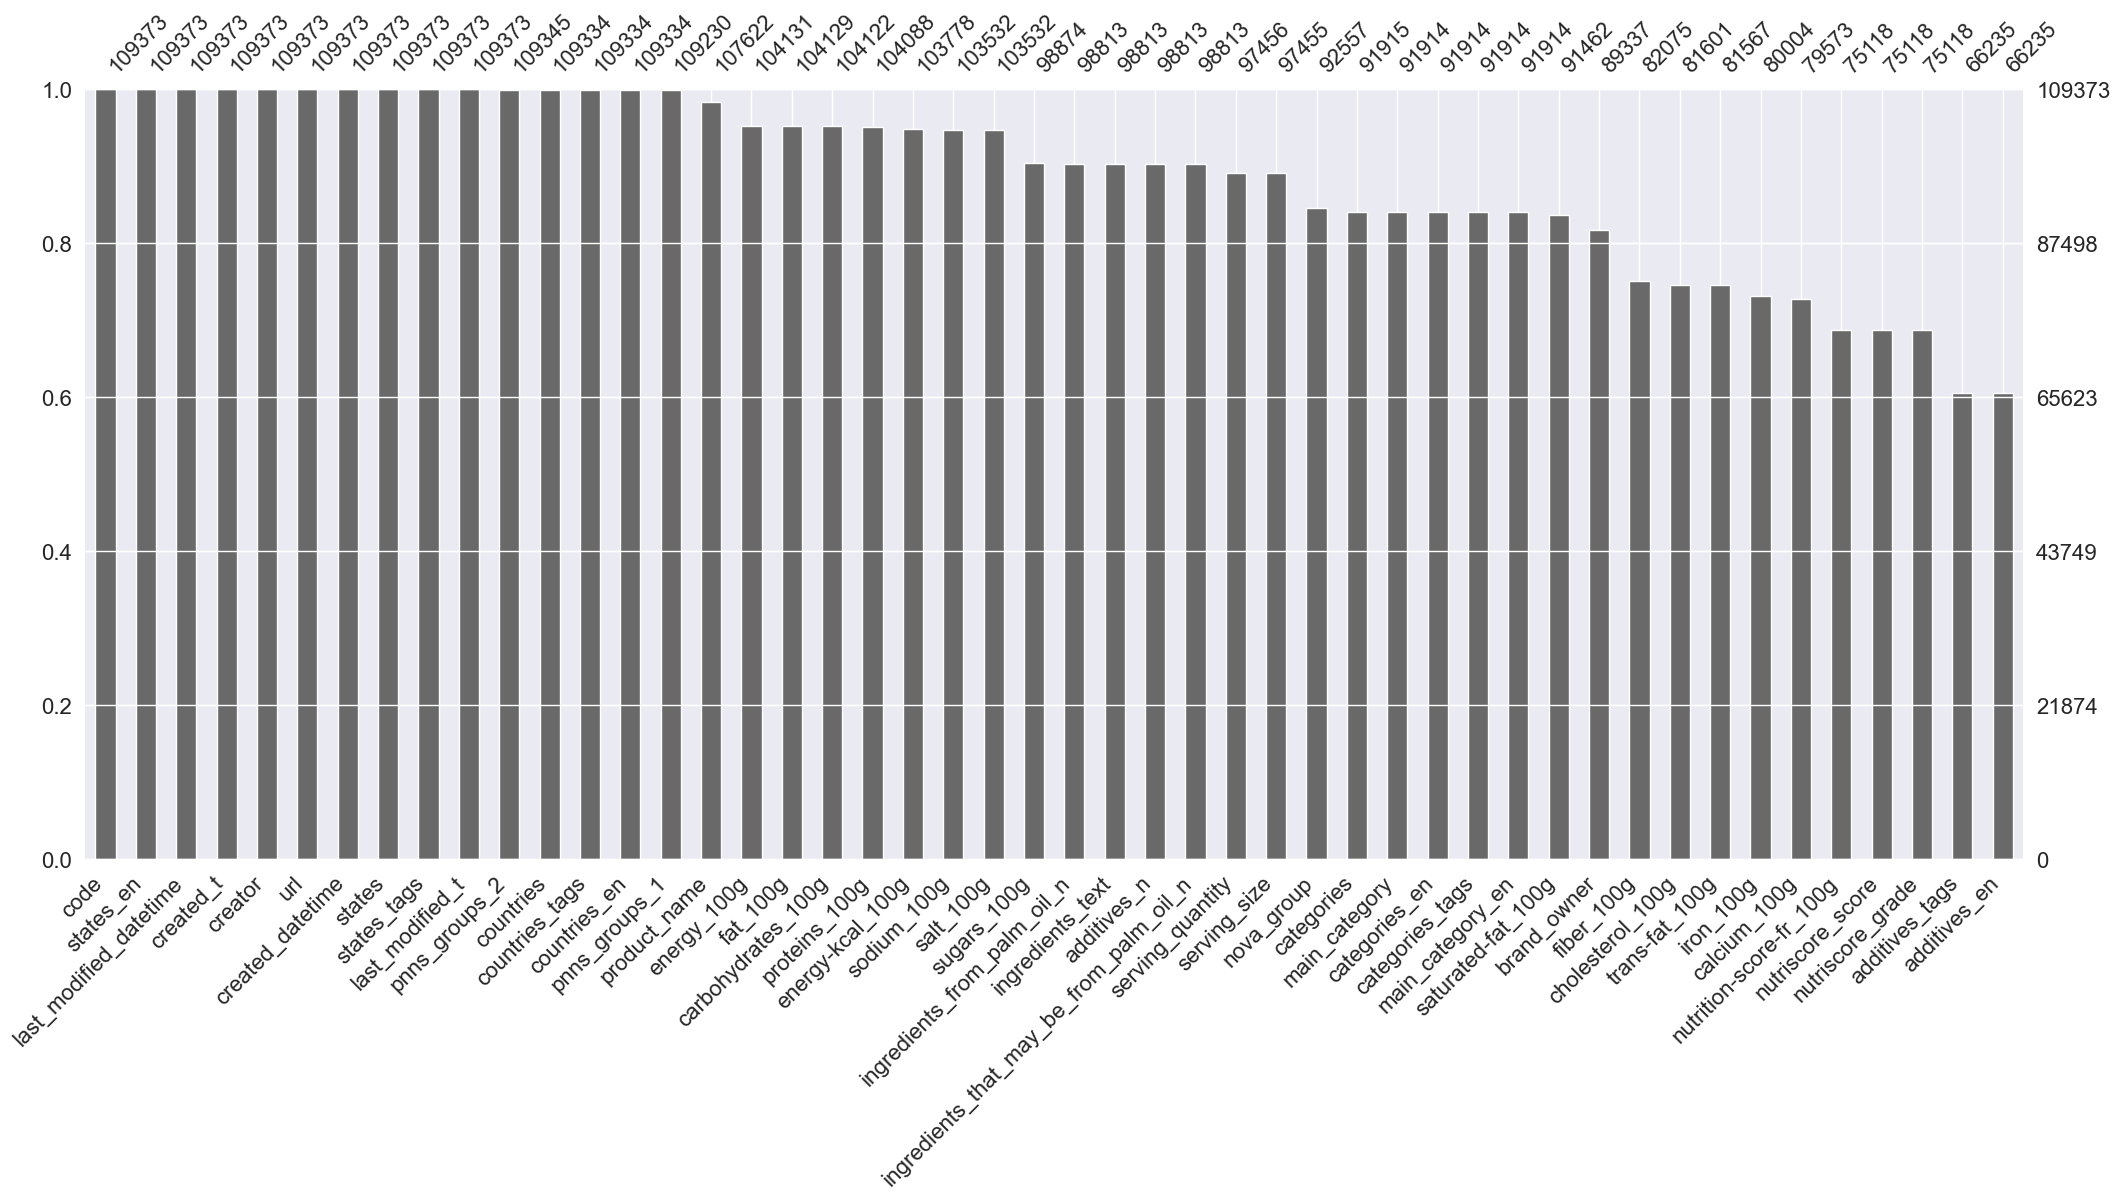

In [44]:
msno.bar(Data , labels=True , sort = 'descending')